# <와플 프로젝트>
#### 심박수(HR)와 호흡수(BR)를 비접촉 레이더 데이터를 활용하여, 접촉(ECG) 데이터와 비교학습하여, 레이더 데이터만 가지고 심박수와 호흡수를 정확하게 예측하는 프로젝트

- *HR(심박, Heart Rate) 및 BR(호흡,Breathing Rate) 예측 모델링*
- *주어진 Radar 데이터에서 정확한 HR과 BR을 예측하기 위한 개인별, FFT크기별 데이터 분석 (DA)*
- *데이터를 활용한 ML/DL 모델 파이프라인 구축 프로젝트*  
(ensemble, svm 사용)

=====================================================  
데이터 : 날짜_사람이름_거리_자세_특이사항.csv  
ecg : 심전도  
bpm : 분당 심장박동수

bin : 사물위치 (- 면 사물 앞, + 면 사물 뒤) 3.6cm 단위  
512fft : 512 frame window (512/20=25.6초 윈도우)의 FFT로 BPM 

=====================================================  
bin_var : 큰 움직임(3.6 cm)의 정도  
motion_energy : 작은 움직임(레이더 신호의 흔들림 크기)의 정도

# 데이터 EDA / 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_list = ["/content/log_20200909110309_chc_0.5_sit_none.csv", "/content/log_20201111155643_ksj_0.5_lie_none.csv",
          "/content/log_20210811104835_les_1.0_sleep.csv", "/content/log_20210812111825_sjy_1.0_lie_none.csv",
          "/content/log_20210818153244_kdu_1.0_lie_none.csv", "/content/log_20210824111504_kdu_1.0_lie_none.csv",
          "/content/log_20210824121025_chc_0.5_lie_none.csv", "/content/log_20210824141813_kdu_1.0_lie_acryl.csv",
          "/content/log_20210824141815_kdu_1.0_lie_opaque.csv", "/content/log_20210906175352_1.0_lie_gmk.csv",
          "/content/log_20210908142718_kdu_1.0_lie_acryl111.csv"]

data = {}
for i, j in enumerate(file_list):
          data[f"df{i}"] = pd.read_csv(j)

In [ ]:
data['df0']

## 타겟값인 'ecg', 'bpm' 의 그래프

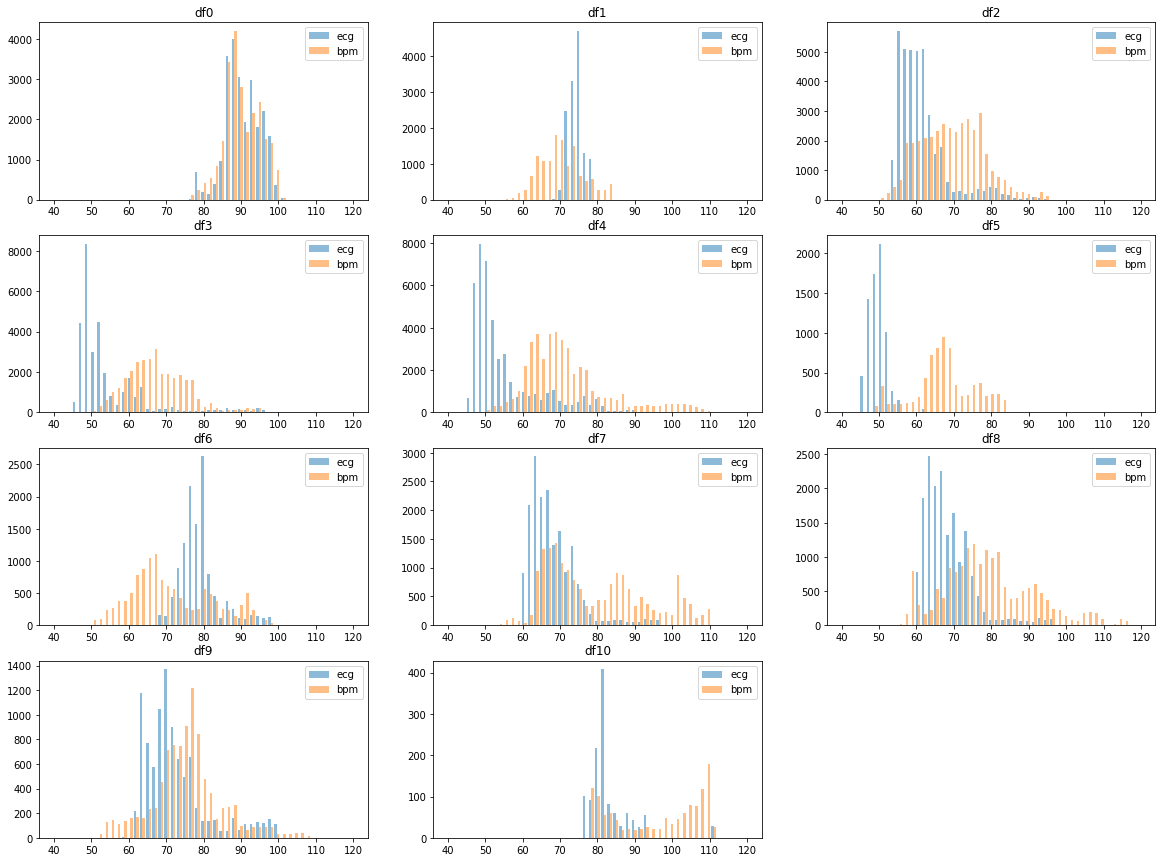

In [ ]:
# ecg와 bpm의 분포 그래프
bins = np.linspace(40, 120, 50)
plt.figure(figsize=(20, 15))
for i, j in enumerate(data):
  plt.subplot(4, 3, i+1)
  
  plt.title(j)
  plt.hist([data[j]['ecg'], data[j]['bpm']], bins,  alpha = 0.5, label = ['ecg', 'bpm'])
  plt.legend(loc='upper right')
  
plt.show()

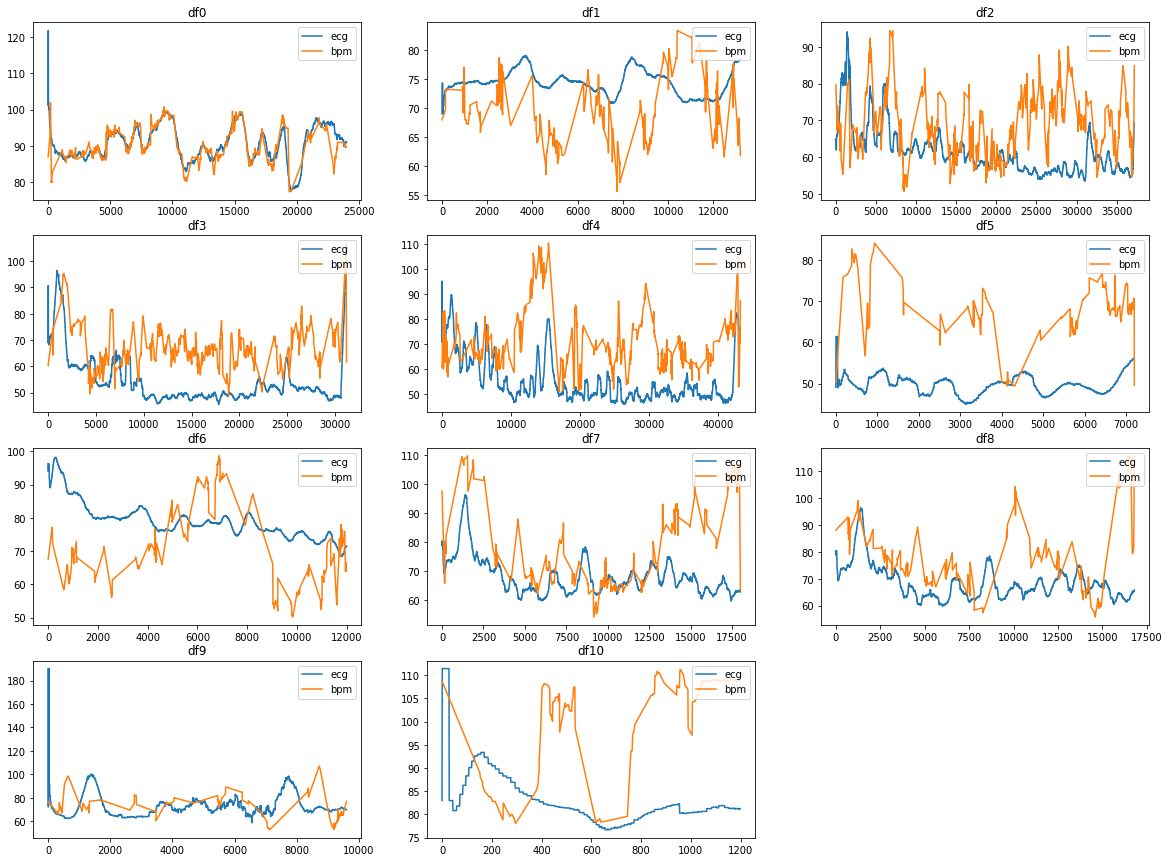

In [ ]:
# ecg와 bpm의 그래프
plt.figure(figsize=(20, 15))
for i, j in enumerate(data):
  plt.subplot(4, 3, i+1)
  plt.title(j)
  plt.plot(data[j]['ecg'], label = 'ecg')
  plt.plot(data[j]['bpm'], label = 'bpm')
  plt.legend(loc='upper right')

plt.show()

## 개인별, fft/bin 크기별 데이터 분석(타겟 : ecg)

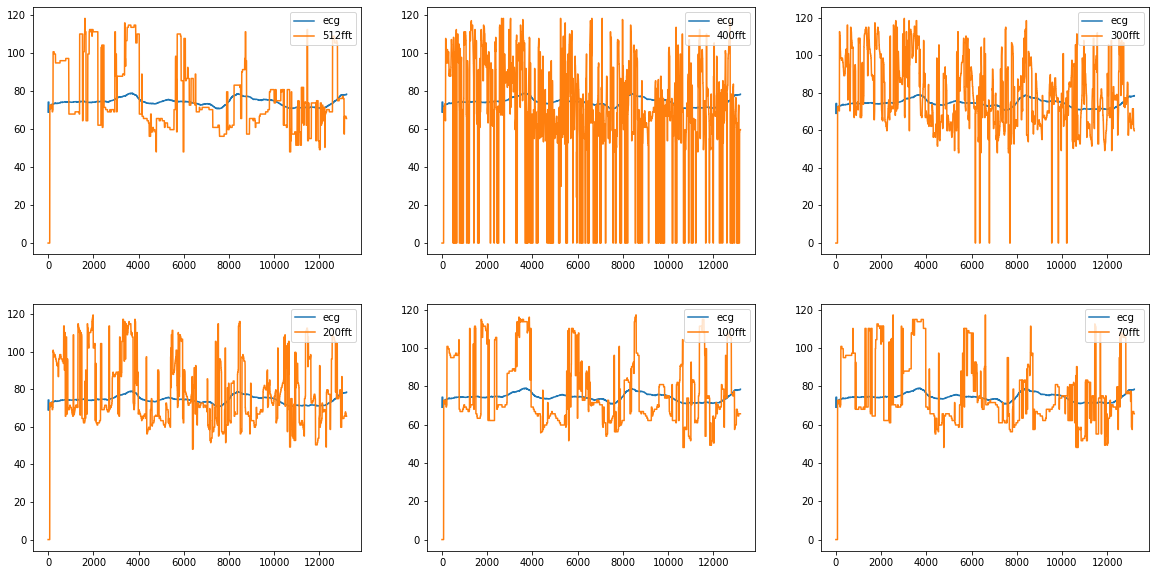

In [ ]:
# ecg와 fft의 그래프
plt.figure(figsize=(20,10))
for i, j in enumerate(['512fft', '400fft',	'300fft',	'200fft',	'100fft',	'70fft']):
  plt.subplot(2, 3, i+1)
  plt.plot(data['df1']['ecg'],label='ecg')
  plt.plot(data['df1'][j], label=j)
  plt.legend(loc='upper right')

plt.show()

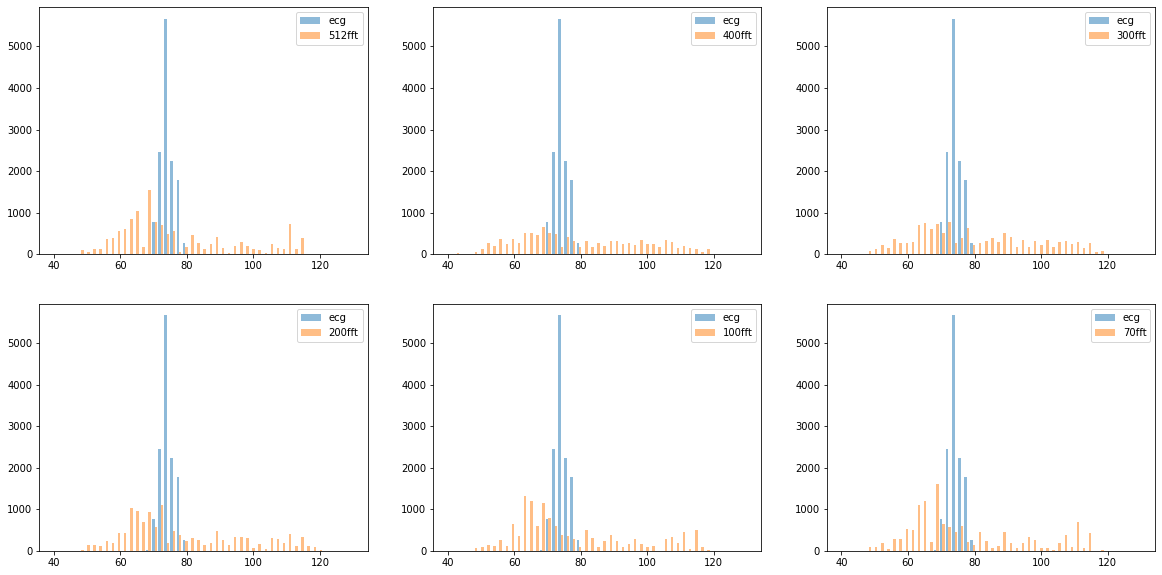

In [ ]:
# ecg와 fft의 분포 그래프
bins=np.linspace(40, 130, 50)
plt.figure(figsize=(20,10))
for i, j in enumerate(['512fft', '400fft',	'300fft',	'200fft',	'100fft',	'70fft']):
  plt.subplot(2, 3, i+1)
  plt.hist([data['df1']['ecg'], data['df1'][j]], bins, alpha=0.5, label=['ecg', j])
  plt.legend(loc='upper right')

plt.show()

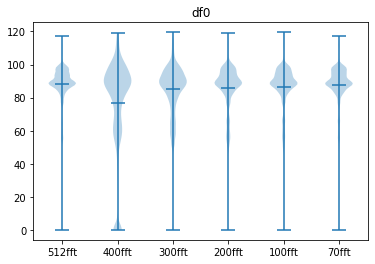

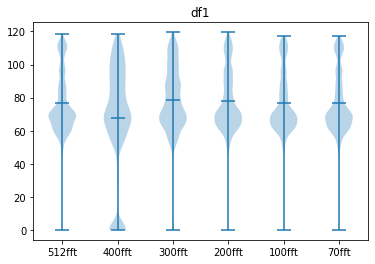

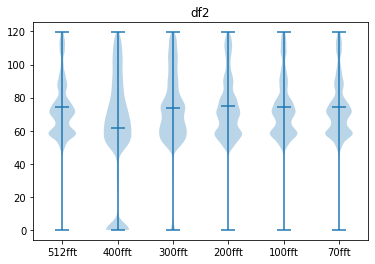

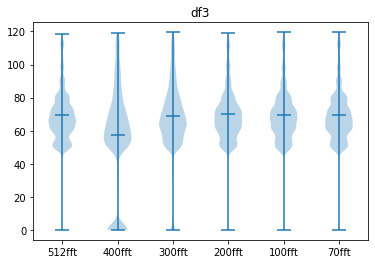

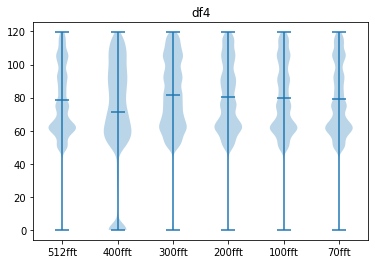

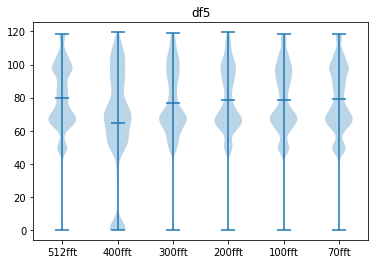

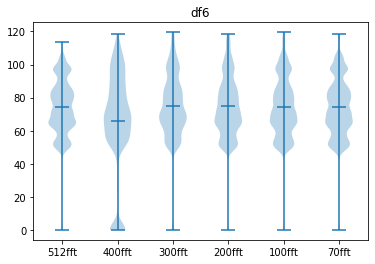

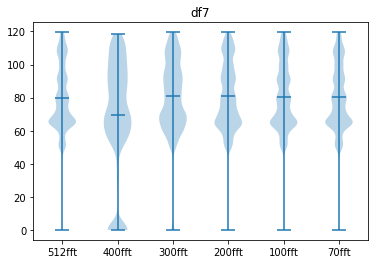

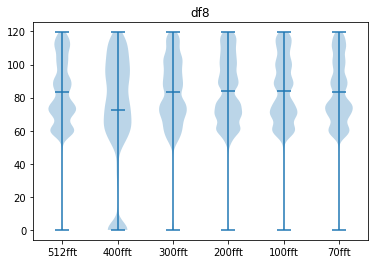

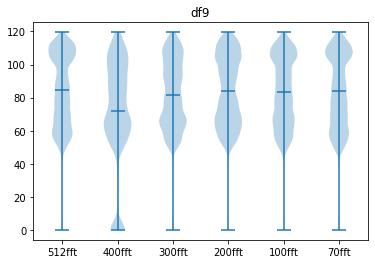

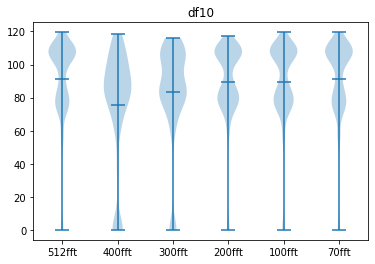

In [ ]:
# fft의 바이올린플롯 (이상치 측정)
for i, j in enumerate(data):
  fig, ax = plt.subplots()
  plt.title(j)
  plt.violinplot([data[j]['512fft'], data[j]['400fft'], data[j]['300fft'], data[j]['200fft'], data[j]['100fft'], data[j]['70fft']], showmeans=True)
  ax.set_xticks(np.arange(1, 7))
  ax.set_xticklabels(['512fft', '400fft', '300fft', '200fft', '100fft', '70fft'])

plt.show()

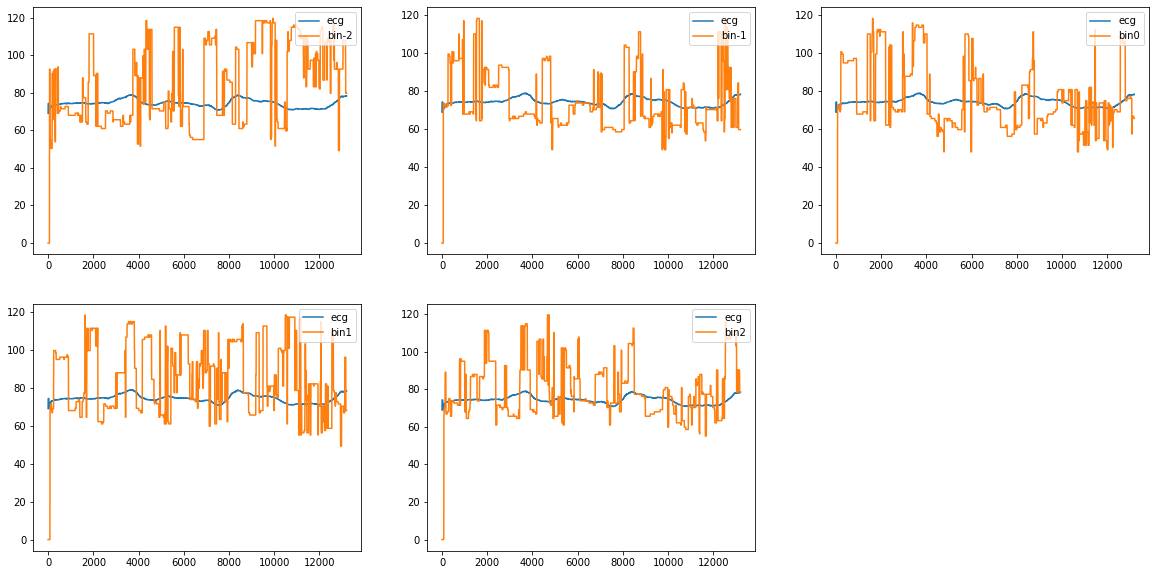

In [ ]:
# ecg와 bin의 그래프
plt.figure(figsize=(20,10))
for i, j in enumerate(['bin-2', 'bin-1', 'bin0', 'bin1', 'bin2']):
  plt.subplot(2, 3, i+1)
  plt.plot(data['df1']['ecg'],label='ecg')
  plt.plot(data['df1'][j], label=j)
  plt.legend(loc='upper right')

plt.show()

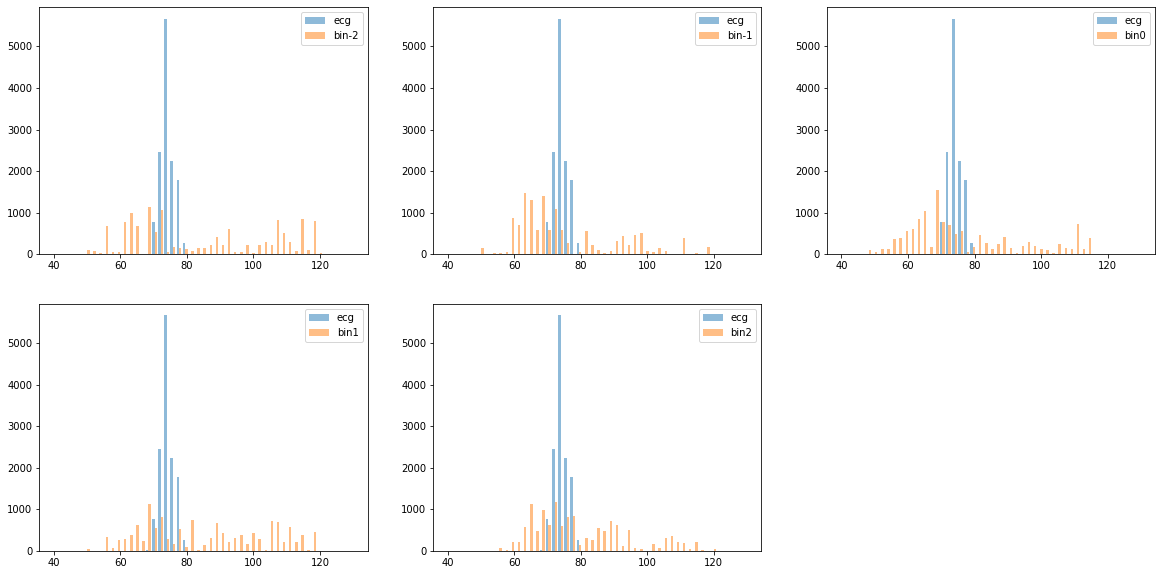

In [ ]:
# ecg와 bin의 분포그래프
bins=np.linspace(40, 130, 50)
plt.figure(figsize=(20,10))
for i, j in enumerate(['bin-2', 'bin-1', 'bin0', 'bin1', 'bin2']):
  plt.subplot(2, 3, i+1)
  plt.hist([data['df1']['ecg'], data['df1'][j]], bins, alpha=0.5, label=['ecg', j])
  plt.legend(loc='upper right')

plt.show()

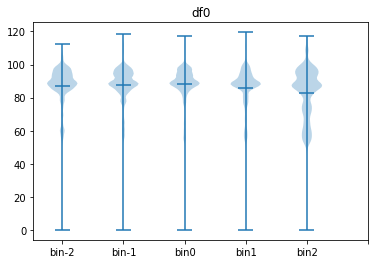

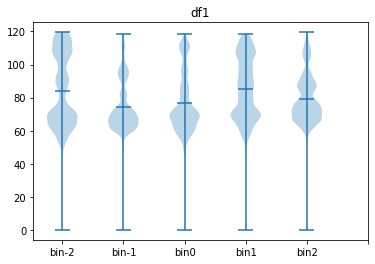

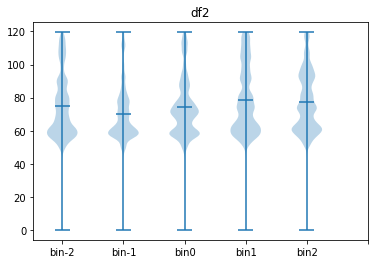

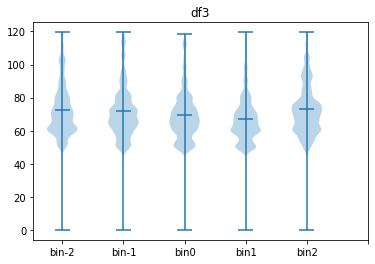

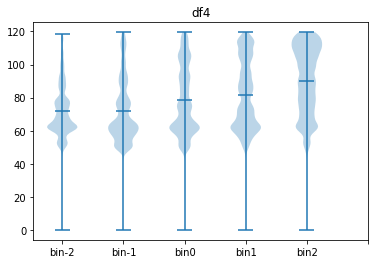

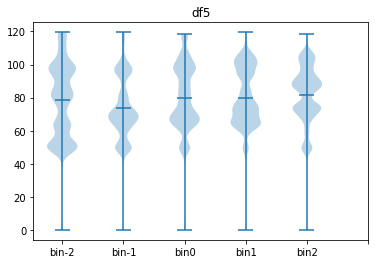

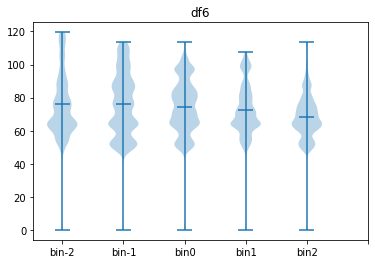

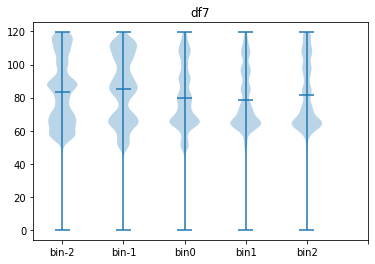

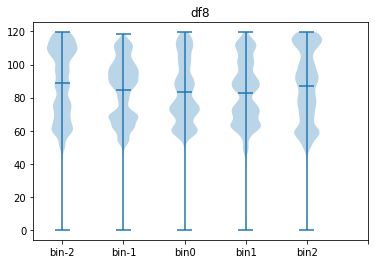

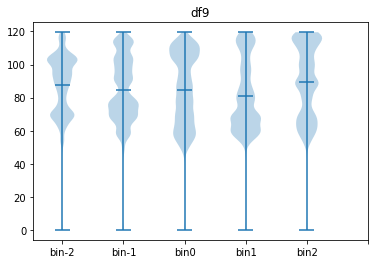

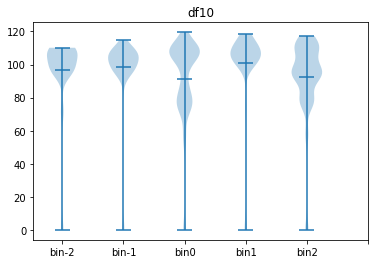

In [ ]:
for i, j in enumerate(data):
  fig, ax = plt.subplots()
  plt.title(j)
  plt.violinplot([data[j]['bin-2'], data[j]['bin-1'], data[j]['bin0'], data[j]['bin1'], data[j]['bin2']], showmeans=True)
  ax.set_xticks(np.arange(1, 7))
  ax.set_xticklabels(['bin-2', 'bin-1', 'bin0', 'bin1', 'bin2'])

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


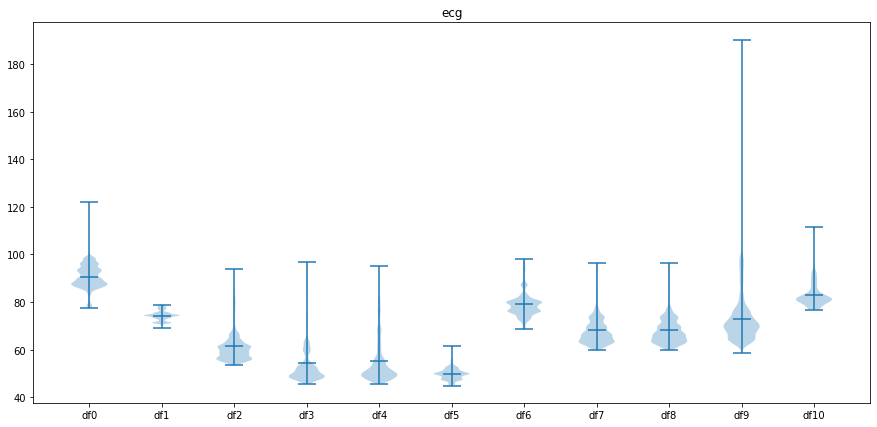

In [ ]:
# 타겟인 ecg의 이상치
fig, ax = plt.subplots(figsize=(15, 7))
plt.title('ecg')
plt.violinplot([data[i]['ecg'] for i in data], showmeans=True)
ax.set_xticks(np.arange(1, 12))
ax.set_xticklabels(['df0', 'df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10'])

plt.show()

# 이상치가 있지만 이상치를 측정하는 것이 중요한 부분

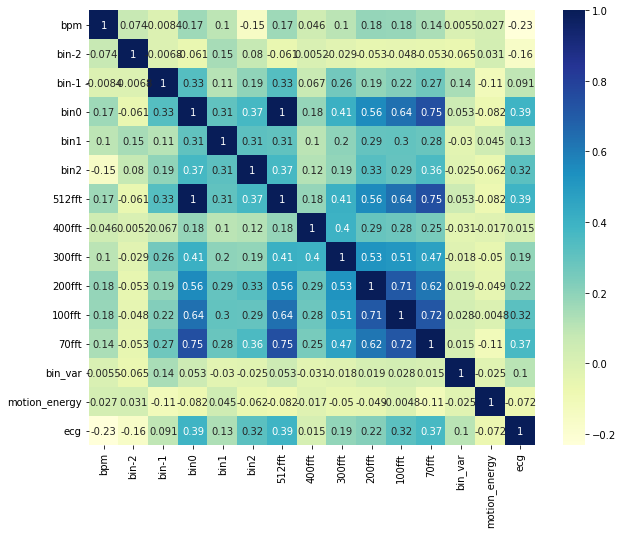

In [ ]:
# 특성과 타겟의 히트맵
plt.figure(figsize=(10, 8))
features = ['bpm', 'bin-2', 'bin-1', 'bin0', 'bin1', 'bin2', '512fft', '400fft', '300fft', '200fft', '100fft', '70fft', 'bin_var',	'motion_energy','ecg']
sns.heatmap(data['df1'][features].corr(),annot=True, cmap='YlGnBu', linecolor = "white")

# 성능 비교를 위한 기본 모델(NN)

전처리
* StandardScaler : 평균 0 분산 1로 조정한다  
* MinMaxScaler : 최대/최소값이 각각 1, 0이 되도록 조정  
(그러나 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다)  

* QuantileTransformer : 기본적으로 1000개 분위를 사용하여 데이터를 '균등분포'
* PowerTransformer : 데이터의 특성별로 정규분포형태에 가깝도록 변환



<img src="https://ifh.cc/g/1gvv9V.png" width="400">

## 1. 개인 기본 모델(NN) 






In [2]:
import numpy as np
from numpy.random import seed
import tensorflow as tf
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, accuracy_score

from sklearn.preprocessing import StandardScaler      
from sklearn.preprocessing import MinMaxScaler        
from sklearn.preprocessing import QuantileTransformer # X (120으로 튀는게 많음)
from sklearn.preprocessing import PowerTransformer   

from sklearn.model_selection import train_test_split

In [4]:
def personal_model(n):
  X = data[n][['bin-2', 'bin-1', 'bin0', 'bin1', 'bin2', '512fft', '400fft', '300fft', '200fft', '100fft', '70fft', 'bin_var', 'motion_energy']] 
  y = data[n][['ecg']]

  scaler_X = MinMaxScaler()
  scaler_y = MinMaxScaler()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
  
  # 훈련데이터
  scaler_X.fit(X_train)
  X_train = scaler_X.transform(X_train)
  scaler_y.fit(y_train)
  y_train = scaler_y.transform(y_train)
  # 테스트 데이터
  X_test = scaler_X.transform(X_test)
  y_test = scaler_y.transform(y_test)
  # 전체 데이터
  X_scale = scaler_X.fit_transform(X)

  # NN 기본모델
  model = Sequential()
  model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

  model.fit(X_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
  
  # 테스트 데이터에 대한 MSE와 MAE
  eval = model.evaluate(X_test, y_test)
  print()
  print(f"test_MSE = {eval[1]:.3f}")        
  print(f"test_MAE = {eval[2]:.3f}")

  pred = model.predict(X_scale)
  pred = scaler_y.inverse_transform(pred)

  test = data[n]['ecg']
  pred = pred.reshape(-1)
  
  # 전체 데이터에 대한 예측 MAE
  print(f"total_MAE = {mean_absolute_error(test, pred):.3f}")

  # 전체 데이터 에러값
  df_e = pd.DataFrame(test)
  df_e['pred'] = pred
  df_e['Error_rate'] = 100 * (abs(df_e['ecg']-df_e['pred'])) / df_e['ecg']
  print(f"Error rate = {np.average(df_e['Error_rate']):.3f}%")

  # 전체 데이터 예측 그래프
  plt.figure(figsize=(12,6))
  plt.title(f'{n} Target & Predict')
  plt.hist([df_e['pred'], df_e['ecg']], bins=100, alpha = 0.5, label = ['pred', 'ecg'])
  plt.legend(loc='upper right')
  plt.show()

  plt.figure(figsize=(12,6))
  plt.plot(df_e['pred'], label = 'pred')
  plt.plot(df_e['ecg'], label = 'ecg')
  plt.legend(loc='upper right')
  plt.show()

57/57 [==============================] - 0s 2ms/step - loss: 0.0285 - mse: 0.0285 - mae: 0.1367 - val_loss: 0.0295 - val_mse: 0.0295 - val_mae: 0.1407
Epoch 30/30
83/83 [==============================] - 0s 1ms/step - loss: 0.0280 - mse: 0.0280 - mae: 0.1363

test_MSE = 0.028
test_MAE = 0.136
total_MAE = 1.359
Error rate = 1.829%


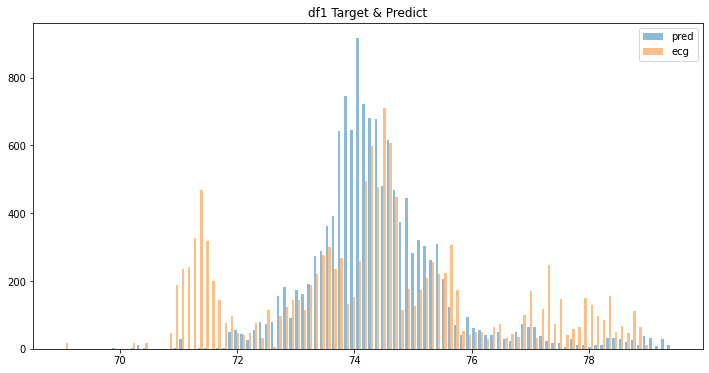

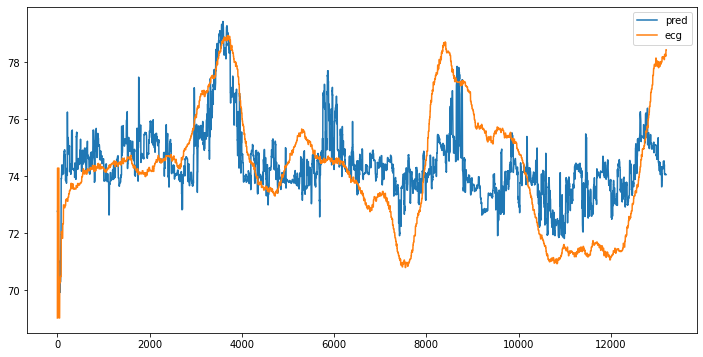

In [ ]:
personal_model('df1')

### df1에 대한 모델 개선

In [ ]:
def personal_improved_model(n):
  # 히트맵에서 0.1이 안되는 특징 제거(bin-2, bin-1, 400fft, motion_energy)
  X = data[n][['bin0', 'bin1', 'bin2', '512fft', '300fft', '200fft', '100fft', '70fft', 'bin_var']] 
  y = data[n][['ecg']]

  # MinMaxScaler는 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다
  # StandardScaler를 사용 
  scaler_X = PowerTransformer()
  scaler_y = PowerTransformer()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
  
  # 훈련데이터
  scaler_X.fit(X_train)
  X_train = scaler_X.transform(X_train)
  scaler_y.fit(y_train)
  y_train = scaler_y.transform(y_train)
  # 테스트 데이터
  X_test = scaler_X.transform(X_test)
  y_test = scaler_y.transform(y_test)
  # 전체 데이터
  X_scale = scaler_X.fit_transform(X)

  # NN 기본모델에서 layer와 node수를 증가, batch_size=64
  model = Sequential()
  model.add(Dense(128, input_dim=9, kernel_initializer='normal', activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

  model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1, validation_split=0.2)
  
  # 테스트 데이터에 대한 MSE와 MAE
  eval = model.evaluate(X_test, y_test)
  print()
  print(f"test_MSE = {eval[1]:.3f}")        
  print(f"test_MAE = {eval[2]:.3f}")

  pred = model.predict(X_scale)
  pred = scaler_y.inverse_transform(pred)

  test = data[n]['ecg']
  pred = pred.reshape(-1)
  
  # 전체 데이터에 대한 예측 MAE
  print(f"total_MAE = {mean_absolute_error(test, pred):.3f}")

  # 전체 데이터 에러값
  df_e = pd.DataFrame(test)
  df_e['pred'] = pred
  df_e['Error_rate'] = 100 * (abs(df_e['ecg']-df_e['pred'])) / df_e['ecg']
  print(f"Error rate = {np.average(df_e['Error_rate']):.3f}%")

  # 전체 데이터 예측 그래프
  plt.figure(figsize=(12,6))
  plt.title(f'{n} Target & Predict')
  plt.hist([df_e['pred'], df_e['ecg']], bins=100, alpha = 0.5, label = ['pred', 'ecg'])
  plt.legend(loc='upper right')
  plt.show()

  plt.figure(figsize=(12,6))
  plt.plot(df_e['pred'], label = 'pred')
  plt.plot(df_e['ecg'], label = 'ecg')
  plt.legend(loc='upper right')
  plt.show()

132/132 [==============================] - 1s 8ms/step - loss: 0.0605 - mse: 0.0605 - mae: 0.1539 - val_loss: 0.0701 - val_mse: 0.0701 - val_mae: 0.1667
Epoch 10/30
132/132 [==============================] - 1s 8ms/step - loss: 0.0573 - mse: 0.0573 - mae: 0.1509 - val_loss: 0.0846 - val_mse: 0.0846 - val_mae: 0.1679
Epoch 11/30
132/132 [==============================] - 1s 7ms/step - loss: 0.0531 - mse: 0.0531 - mae: 0.1431 - val_loss: 0.0625 - val_mse: 0.0625 - val_mae: 0.1489
Epoch 12/30
132/132 [==============================] - 1s 7ms/step - loss: 0.0510 - mse: 0.0510 - mae: 0.1374 - val_loss: 0.0546 - val_mse: 0.0546 - val_mae: 0.1543
Epoch 13/30
132/132 [==============================] - 1s 7ms/step - loss: 0.0437 - mse: 0.0437 - mae: 0.1253 - val_loss: 0.0558 - val_mse: 0.0558 - val_mae: 0.1372
Epoch 14/30
132/132 [==============================] - 1s 7ms/step - loss: 0.0370 - mse: 0.0370 - mae: 0.1146 - val_loss: 0.0486 - val_mse: 0.0486 - val_mae: 0.1232
Epoch 15/30
132/132 [=

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"


total_MAE = 0.180
Error rate = 0.242%


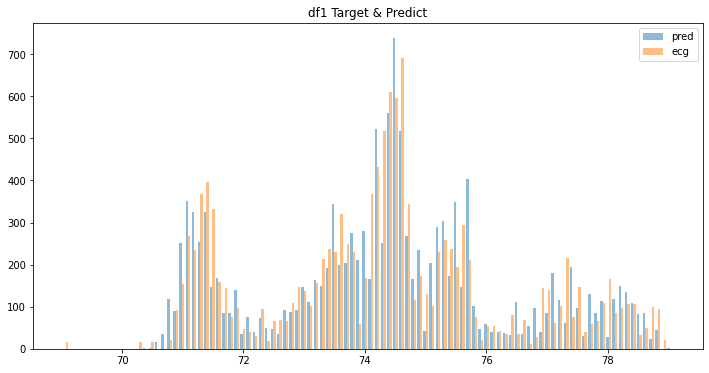

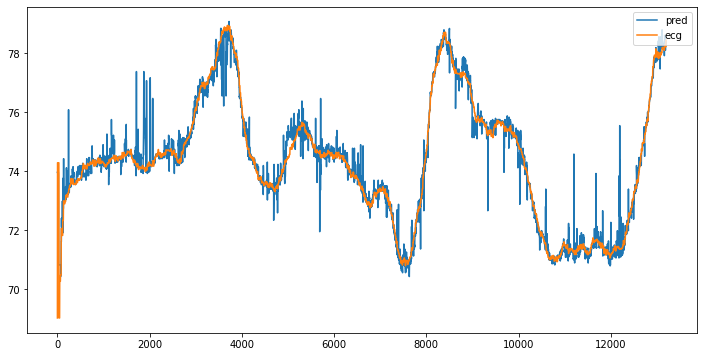

In [ ]:
personal_improved_model('df1')

## 2. 전체 데이터(df0~df10) 범용모델

In [128]:
# 전체 합친 데이터
df = pd.concat([data[i] for i in data])

In [129]:
df = df.reset_index()
df.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.shape

(213600, 15)

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['ecg'], bins=200, alpha=0.7)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['ecg'])
plt.show()

In [130]:
X_total = df[['bin-2', 'bin-1', 'bin0', 'bin1', 'bin2', '512fft', '400fft', '300fft', '200fft', '100fft', '70fft', 'bin_var', 'motion_energy']]
y_total = df[['ecg']]

In [131]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_total_train, X_total_test, y_total_train, y_total_test = train_test_split(X_total, y_total, test_size=0.2, random_state = 2)

# 훈련데이터
scaler_X.fit(X_total_train)
X_total_train = scaler_X.transform(X_total_train)

scaler_y.fit(y_total_train)
y_total_train = scaler_y.transform(y_total_train)

# 테스트 데이터
X_total_test = scaler_X.transform(X_total_test)
y_total_test = scaler_y.transform(y_total_test)

# 전체 데이터
X_scale = scaler_X.fit_transform(X_total)
y_scale = scaler_y.fit_transform(y_total)

In [132]:
# 전체 데이터 학습
model_T = Sequential()
model_T.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
model_T.add(Dense(30, activation='relu'))
model_T.add(Dense(1, activation='linear'))

model_T.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history = model_T.fit(X_total_train, y_total_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
912/912 [==============================] - 3s 3ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0677 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0652
Epoch 2/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0641 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0628
Epoch 3/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0615 - val_loss: 0.0057 - val_mse: 0.0057 - val_mae: 0.0616
Epoch 4/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0594 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0625
Epoch 5/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0580 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0571
Epoch 6/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0573 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0607
Epoch 7/30
912/9

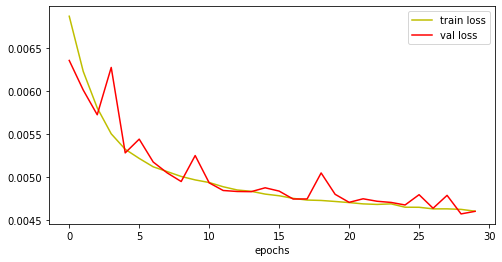

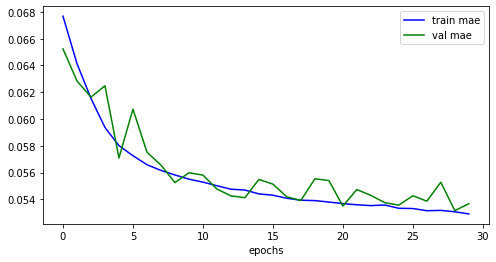

In [133]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],'y',label='train loss')
plt.plot(history.history['val_loss'],'r',label='val loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.figure(figsize=(8,4))
plt.plot(history.history['mae'],'b',label='train mae')
plt.plot(history.history['val_mae'],'g',label='val mae')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [134]:
def graph(pred, test):
  # 그래프
  pred = pd.DataFrame(pred, columns=['pred'])
  test = pd.DataFrame(test, columns = ['target'])
  plt.figure(figsize=(20,6))
  plt.plot(pred, label='pred', alpha=0.5)
  plt.plot(test, label='ecg', alpha=0.5)
  plt.legend(loc='upper right')
  plt.show()

  # 분포 그래프
  D = pd.concat([pred, test], axis=1)
  plt.figure(figsize=(12,6))
  plt.hist([D['pred'], D['target']], bins=100, alpha=0.5, label=['pred', 'target'])
  plt.legend(loc='upper right')
  plt.show

In [135]:
# 테스트 데이터 예측 MAE
pred = model_T.predict(X_total_test)
pred = scaler_y.inverse_transform(pred)
test = scaler_y.inverse_transform(y_total_test)
pred = pred.reshape(-1)

# 테스트 데이터 예측 Error Rate
ER = pd.DataFrame(pred, columns=['pred'])
ER['ecg'] = test
ER['Error'] = (abs(ER['pred'] - ER['ecg']) / ER['ecg']) * 100

print(f"test_MAE = {mean_absolute_error(test, pred):.3f}")
print(f"Error rate = {np.average(ER['Error']):.3f}")

test_MAE = 7.769
Error rate = 12.330


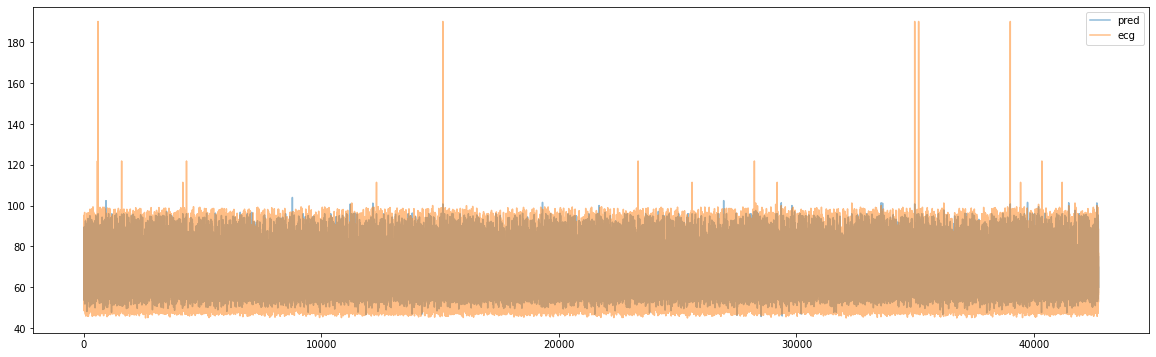

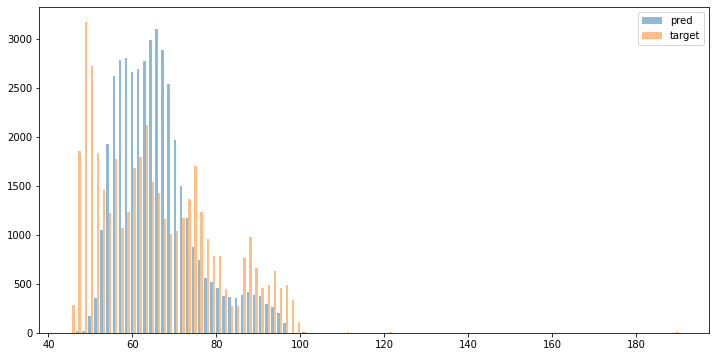

In [136]:
graph(pred, test)

In [137]:
# 전체(훈련 + 테스트) 데이터 예측
pred_T = model_T.predict(X_scale)
pred_T = scaler_y.inverse_transform(pred_T)
test_T = scaler_y.inverse_transform(y_scale)
pred_T = pred_T.reshape(-1)

# Error rate
ER = pd.DataFrame(pred_T, columns=['pred'])
ER['ecg'] = test_T
ER['Error'] = (abs(ER['pred'] - ER['ecg']) / ER['ecg']) * 100

print(f"MAE = {mean_absolute_error(test_T, pred_T):.3f}")
print(f"Error rate = {np.average(ER['Error']):.3f}")

MAE = 7.757
Error rate = 12.300


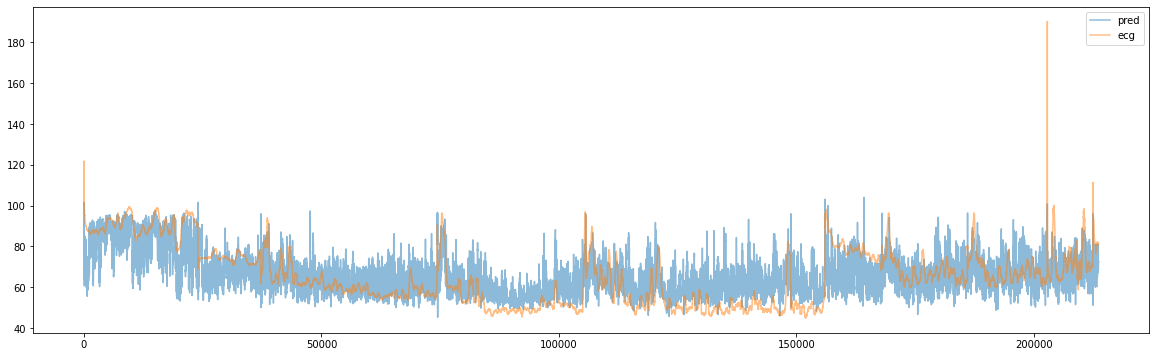

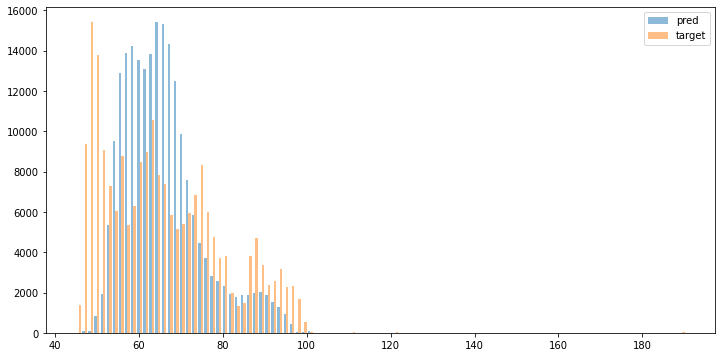

In [138]:
graph(pred_T, test_T)

MinMAxScaler : test_MAE = 7.728 Error rate = 12.080  
**PowerTransformer : test_MAE = 6.984 Error rate = 10.556**  
StandardScaler : test_MAE = 7.011 Error rate = 11.011  
QuantileTransformer : test_MAE = 7.646 Error rate = 11.413  


## PCA

In [9]:
from sklearn.decomposition import PCA
from sklearn import decomposition

In [29]:
pca = decomposition.PCA(n_components = 5)
pc = pca.fit_transform(X_scale)

pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pc_df['Cluster'] = y_scale
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,Cluster
0,2.037261,0.385904,0.53761,0.189884,-0.045929,0.387768
1,2.037261,0.385904,0.53761,0.189884,-0.045929,0.529400
2,2.037261,0.385904,0.53761,0.189884,-0.045929,0.529400
3,2.037261,0.385904,0.53761,0.189884,-0.045929,0.529400
4,2.037261,0.385904,0.53761,0.189884,-0.045929,0.529400


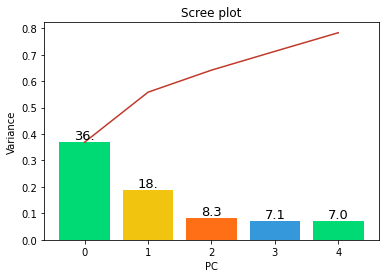

In [11]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca)

In [12]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.36933699 0.18903794 0.08337814 0.07117515 0.07039439]
0.7833225981732718


In [13]:
pc_df.shape

(213600, 6)

In [30]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
pc_X_train, pc_X_test, pc_y_train, pc_y_test = train_test_split(pc_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']], pc_df[['Cluster']], test_size=0.2, random_state = 2)

# 훈련데이터
scaler_X.fit(pc_X_train)
pc_X_train = scaler_X.transform(pc_X_train)

scaler_y.fit(pc_y_train)
pc_y_train = scaler_y.transform(pc_y_train)

# 테스트 데이터
pc_X_test = scaler_X.transform(pc_X_test)
pc_y_test = scaler_y.transform(pc_y_test)

In [31]:
model_pc = Sequential()
model_pc.add(Dense(20, input_dim=5, kernel_initializer='normal', activation='relu'))
model_pc.add(Dense(30, activation='relu'))
model_pc.add(Dense(1, activation='linear'))

model_pc.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history = model_pc.fit(pc_X_train, pc_y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0738 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0698
Epoch 2/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0688 - val_loss: 0.0067 - val_mse: 0.0067 - val_mae: 0.0673
Epoch 3/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0669 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0668
Epoch 4/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0657 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0663
Epoch 5/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0650 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0645
Epoch 6/30
912/912 [==============================] - 2s 2ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0648 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0656
Epoch 7/30
912/9

In [22]:
pred_pc = model_pc.predict(pc_X_test)
pred_pc = pred_pc.reshape(-1)
pred_pc

array([0.11983224, 0.10742635, 0.14084187, ..., 0.14941385, 0.110586  ,
       0.18403459], dtype=float32)

In [27]:
pc_y_test

array([[0.06170661],
       [0.02616767],
       [0.19462957],
       ...,
       [0.05315351],
       [0.21670916],
       [0.21767794]])

In [32]:
pred_pc = model_pc.predict(pc_X_test)
pred_pc = pred_pc.reshape(-1,1)
pred_pc = scaler_y.inverse_transform(pred_pc)
test_pc = scaler_y.inverse_transform(pc_y_test)


# 테스트 데이터 예측 Error Rate
ER = pd.DataFrame(pred_pc, columns=['pred_pc'])
ER['ecg'] = test_pc
ER['Error'] = (abs(ER['pred_pc'] - ER['ecg']) / ER['ecg']) * 100

print(f"test_MAE = {mean_absolute_error(test_pc, pred_pc):.3f}")
print(f"Error rate = {np.average(ER['Error']):.3f}")

test_MAE = 0.063
Error rate = inf


In [43]:
ER = ER.drop([2595, 25412, 32094, 36753])

In [44]:
ER['Error'].mean()

112.02778319532351

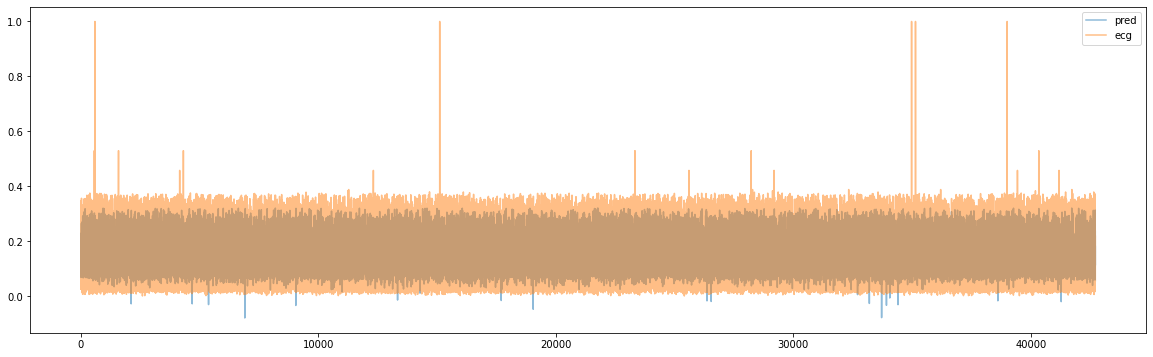

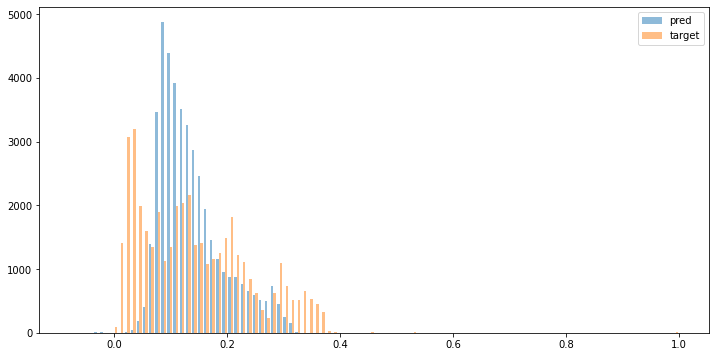

In [40]:
graph(pred_pc, test_pc)

# 모델 성능 향상
### Stacking Ensemble Model
* 원본 데이터의 train, test가 존재
* 원본 train data를 여러개의 모델로 학습
* 각 모델마다 test데이터를 넣어서 예측 후 predict을 뽑아냄
* 여러개의 predict 데이터를 다시 train 데이터로 사용
* 최종 모델을 하나 선정하여 학습
* 최종 평가  

==========================================================
* NN, SVM, RandomForestRegression, XGBoost, LGBM 5개의 모델로 각각 학습
* PCA와 특성 중요도 파악
* 전처리 및 하이퍼파라미터 조정 후 가장 성능이 좋은 모델을 최종모델로 하여 학습 or NN으로 layer와 node수 늘린 것을 최종모델로 선정

## NN, SVM, RandomForest, XGBoost, LGBM 5개의 모델 특성중요도

In [45]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
import pickle
import joblib

In [106]:
# 모델1 = NN(은닉층의 노드 수 증가, layer 추가, 활성화 함수 leaky relu)
model1 = Sequential()
model1.add(Dense(256, input_dim=13, kernel_initializer='normal', activation='relu'))
model1.add(Dense(512, activation='leaky_relu'))
model1.add(Dense(512, activation='leaky_relu'))
model1.add(Dense(1, activation='linear'))

model1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

model1.fit(X_total_train, y_total_train, epochs=30, batch_size=100, verbose=1, validation_split=0.2)

Epoch 1/30
1368/1368 [==============================] - 16s 12ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0640 - val_loss: 0.0052 - val_mse: 0.0052 - val_mae: 0.0569
Epoch 2/30
1368/1368 [==============================] - 15s 11ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0560 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0585
Epoch 3/30
1368/1368 [==============================] - 16s 11ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0533 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0510
Epoch 4/30
1368/1368 [==============================] - 15s 11ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0510 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0488
Epoch 5/30
1368/1368 [==============================] - 15s 11ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0488 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0479
Epoch 6/30
1368/1368 [==============================] - 15s 11ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0466 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae:

In [ ]:
# 모델2 = SVM
model2 = SVR(kernel='rbf', gamma = 'auto')
model2.fit(X_total_train, y_total_train)

# kernel : 선형 커널
# C : 학습 오류에 대한 패널티, C 값이 클 수록 모델이 학습 데이터에 좀 더 최적화 됨, 너무 크면 오버피팅 발생
# Epsilon : 임계값, 예측한 값이 GT 범위 안에 있으면 패널티 부여 X

joblib.dump(model2, '/content/SVRmodel.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['/content/SVRmodel.pkl']

In [101]:
# 저장한 SVR모델 불러오기
model2 = joblib.load('/content/SVRmodel.pkl')

In [103]:
# 모델3 = 랜덤포레스트
model3 = RandomForestRegressor(n_estimators = 200, max_depth = 25, random_state=2)
model3.fit(X_total_train, y_total_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=25, n_estimators=200, random_state=2)

In [104]:
# 모델4 = XGB
model4 = xgb.XGBRegressor(n_estimators = 200, max_depth = 25, random_state=2)
model4.fit(X_total_train, y_total_train)

[02:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=25, n_estimators=200, random_state=2)

In [105]:
# 모델5 = LGBM
model5 = LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=25, random_state=2)
model5.fit(X_total_train, y_total_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(learning_rate=0.05, max_depth=25, n_estimators=1000,
              random_state=2)

In [46]:
def evaluation(model):
  pred = model.predict(X_total_test)
  pred = pred.reshape(-1, 1)
  pred = scaler_y.inverse_transform(pred)

  test = scaler_y.inverse_transform(y_total_test)

  mse = mean_squared_error(test, pred)
  mae = mean_absolute_error(test, pred)

  ER = pd.DataFrame(pred, columns=['pred'])
  ER['ecg'] = test
  ER['Error'] = (abs(ER['pred'] - ER['ecg']) / ER['ecg']) * 100
  er = np.average(ER['Error'])
  
  print("MSE =", mse)
  print("MAE =", mae)
  print("Error Rate =", er)

In [112]:
# 5개 모델에 대한 테스트데이터 평가지표
print("NN model")
evaluation(model1)
print()
print("SVR model")    # 성능이 가장 안좋음
evaluation(model2)
print()
print("RFR model")
evaluation(model3)
print()
print("XGB model")
evaluation(model4)
print()
print("LGBM model")
evaluation(model5)

NN model
MSE = 27.125777693118895
MAE = 3.753361290865751
Error Rate = 5.957262166254521

SVR model
MSE = 135.56484711205684
MAE = 9.714025922464595
Error Rate = 15.45855441272014

RFR model
MSE = 2.695962640387204
MAE = 0.4188675802463331
Error Rate = 0.6552728269638641

XGB model
MSE = 2.6723517708028406
MAE = 0.37787716948068706
Error Rate = 0.5898725828542767

LGBM model
MSE = 18.71654318254698
MAE = 3.092149467445813
Error Rate = 4.903370789458836


In [ ]:
def get_top_features(model):
    features = ['bin-2', 'bin-1', 'bin0', 'bin1', 'bin2', '512fft', '400fft', '300fft', '200fft', '100fft', '70fft', 'bin_var', 'motion_energy']
    ftr_importances_values = model.feature_importances_ 
    ftr_importances = pd.Series(ftr_importances_values, index=features)
    ftr_top = ftr_importances.sort_values(ascending=False)
    return ftr_top

def visualize_ftr_importances(models):
    fig, axs = plt.subplots(figsize=(20,10),nrows=1, ncols=3)
    fig.tight_layout() 
    model_name = ['RFR', 'XGB', 'LGBM']
    for i, model in enumerate(models):
        ftr_top = get_top_features(model)
        axs[i].set_title(f'{model_name[i]} Feature Importances', size=25)
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(20)
        sns.barplot(x=ftr_top.values, y=ftr_top.index , ax=axs[i])

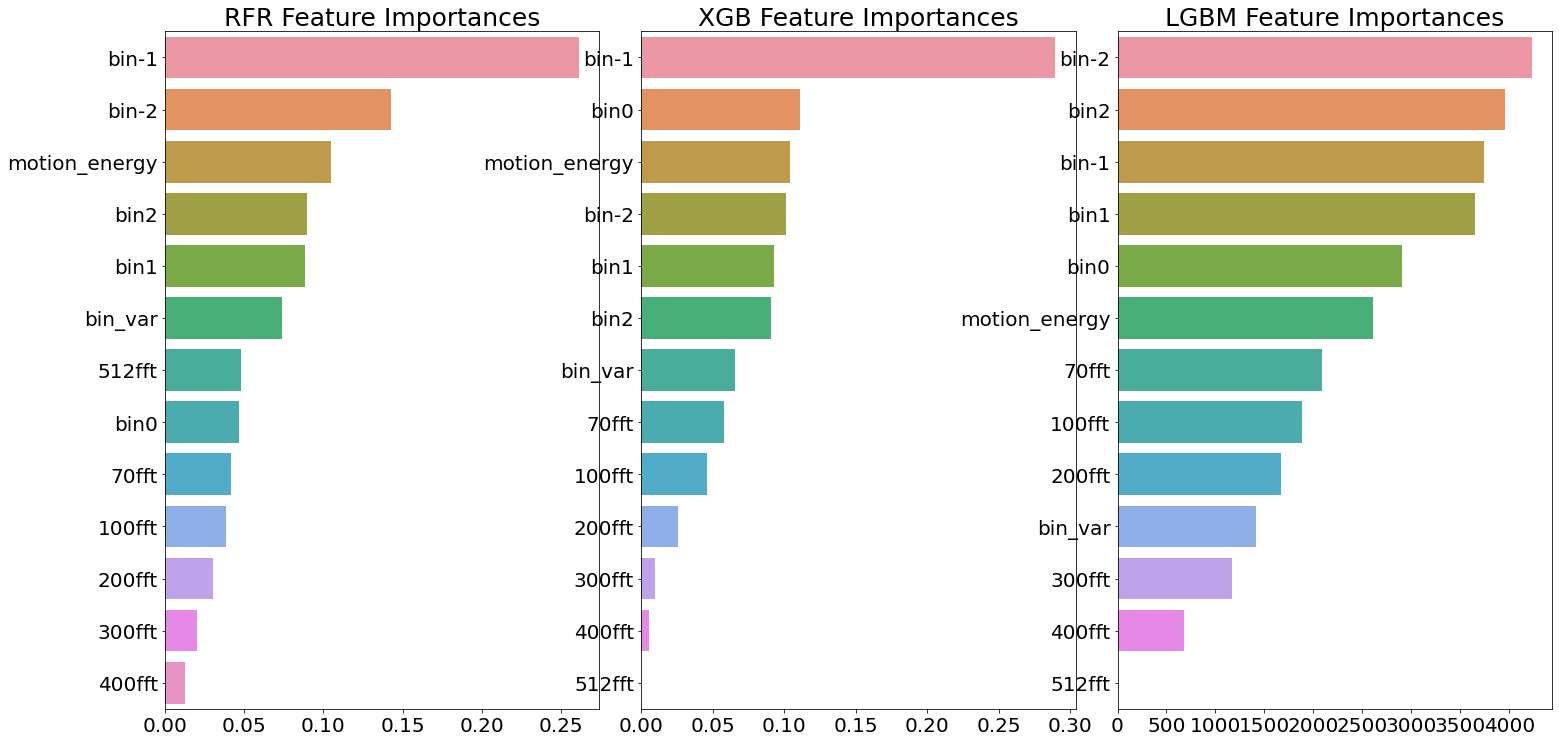

In [ ]:
visualize_ftr_importances([model3, model4, model5])

## 제공해주신 예제 ensemble 방법

In [ ]:
from numpy import dstack
members = [model1, model3, model4, model5]

def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX)
		yhat = yhat.reshape(yhat.shape[0], 1)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))

	return stackX

In [ ]:
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=25)
	model.fit(stackedX, inputy)
	return model

In [ ]:
model = fit_stacked_model(members, X_total_train, y_total_train)

[07:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [ ]:
yhat = stacked_prediction(members, model, X_total_test)
predictions = scaler_y.inverse_transform([yhat])

btest = scaler_y.inverse_transform(y_total_test)
bpred = predictions.reshape(-1)
mae = mean_absolute_error(btest, bpred)
print('Stacked Test MAE: %.3f' % mae)

Stacked Test MAE: 7.212


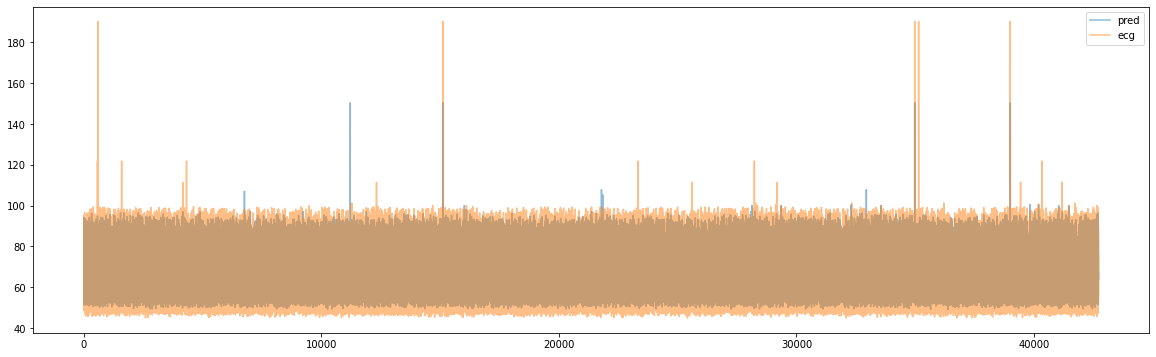

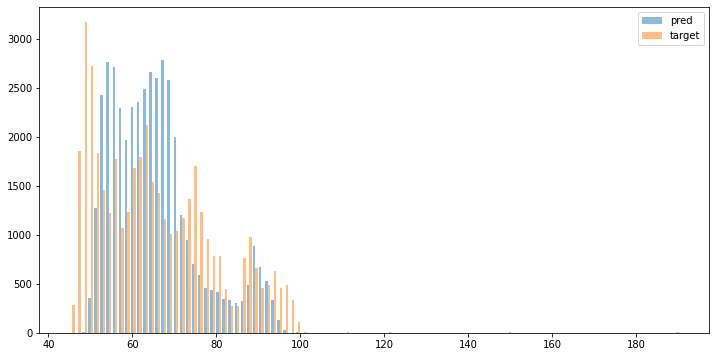

In [ ]:
graph(bpred, btest)

## CV KFold 스태킹 앙상블

In [113]:
# 특성중요도에서 하위 3개중 중복되는 것이 400fft와 300fft이므로 제거하고 모델링
X_final = df[['bin-2', 'bin-1', 'bin0', 'bin1', 'bin2', '512fft', '200fft', '100fft', '70fft', 'bin_var', 'motion_energy']]
y_final = df[['ecg']]

In [114]:
# PowerTransformer 사용
scaler_X = PowerTransformer()
scaler_y = PowerTransformer()

X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state = 2)

# 훈련데이터
scaler_X.fit(X_final_train)
X_final_train = scaler_X.transform(X_final_train)

scaler_y.fit(y_final_train)
y_final_train = scaler_y.transform(y_final_train)

# 테스트 데이터
X_final_test = scaler_X.transform(X_final_test)
y_final_test = scaler_y.transform(y_final_test)

# 전체 데이터
X_final_scaled = scaler_X.fit_transform(X_final)
y_final_scaled = scaler_y.fit_transform(y_final)

In [49]:
from sklearn.model_selection import KFold

# 메타 모델을 위한 학습 및 테스트 데이터 만들기
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=11)
    # 빈 배열 생성
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('폴드 세트 : ', folder_counter, ' 시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index] 
        
        # 폴드 내 모델 학습
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1) # y_train 예측, 폴드 끝나면 concat해야함
        test_pred[:, folder_counter] = model.predict(X_test_n).reshape(-1) # y_test 예측, 폴드 끝나면 평균 낼거임
        
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean # 하나의 모델에 대한 학습데이터, 테스트 데이터 생성

In [ ]:
# 4가지 모델(SVR의 평가지표가 안좋아서 빼고 4가지 모델로 진행)
model1 = Sequential()
model1.add(Dense(256, input_dim=11, kernel_initializer='normal', activation='relu'))
model1.add(Dense(512, activation='leaky_relu'))
model1.add(Dense(512, activation='leaky_relu'))
model1.add(Dense(1, activation='linear'))
model1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

model2 = RandomForestRegressor(n_estimators = 200, max_depth = 25, random_state=2)

model3 = xgb.XGBRegressor(n_estimators = 200, max_depth=25, random_state=2)

model4 = LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=25, random_state=2)

# 최종모델
lr_final = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=25)

# 개별 모델로부터 메타 모델에 필요한 데이터 셋 만들기
NN_train, NN_test = get_stacking_base_datasets(model1, X_final_train, y_final_train, X_final_test, 7)
RFR_train, RFR_test = get_stacking_base_datasets(model2, X_final_train, y_final_train, X_final_test, 7)
XGB_train, XGB_test = get_stacking_base_datasets(model3, X_final_train, y_final_train, X_final_test, 7)
LGBM_train, LGBM_test = get_stacking_base_datasets(model4, X_final_train, y_final_train, X_final_test, 7)

# 개별 모델로부터 나온 y_final_train 예측값들 옆으로 붙이기
Stack_X_final_train = np.concatenate((NN_train, RFR_train, XGB_train, LGBM_train), axis=1)
# 개별 모델로부터 나온 y_test 예측값들 옆으로 붙이기
Stack_X_final_test = np.concatenate((NN_test, RFR_test, XGB_test, LGBM_test), axis=1)

폴드 세트 :  0  시작
4578/4578 [==============================] - 29s 6ms/step - loss: 0.5055 - mse: 0.5055 - mae: 0.5623
폴드 세트 :  1  시작
4578/4578 [==============================] - 29s 6ms/step - loss: 0.3905 - mse: 0.3905 - mae: 0.4788
폴드 세트 :  2  시작
4578/4578 [==============================] - 29s 6ms/step - loss: 0.3155 - mse: 0.3155 - mae: 0.4227
폴드 세트 :  3  시작
4578/4578 [==============================] - 31s 7ms/step - loss: 0.2648 - mse: 0.2648 - mae: 0.3831
폴드 세트 :  4  시작
4578/4578 [==============================] - 30s 6ms/step - loss: 0.2261 - mse: 0.2261 - mae: 0.3519
폴드 세트 :  5  시작
4578/4578 [==============================] - 29s 6ms/step - loss: 0.1962 - mse: 0.1962 - mae: 0.3257
폴드 세트 :  6  시작
4578/4578 [==============================] - 29s 6ms/step - loss: 0.1741 - mse: 0.1741 - mae: 0.3058
폴드 세트 :  0  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  1  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  2  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  3  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  4  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  5  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  6  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  0  시작
[12:32:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  1  시작
[12:34:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  2  시작
[12:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  3  시작
[12:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  4  시작
[12:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  5  시작
[12:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  6  시작
[12:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  1  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  2  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  3  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  4  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  5  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  6  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 베이지안 최적화

In [ ]:
!pip install Bayesian-Optimization

In [ ]:
from bayes_opt import BayesianOptimization
def XGB_cv(max_depth,learning_rate, n_estimators, gamma
             ,min_child_weight, subsample
             ,colsample_bytree, silent=True, nthread=-1):

      # 모델 정의
      model = xgb.XGBRegressor(max_depth=int(max_depth),
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                gamma=gamma,
                                min_child_weight=min_child_weight,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree, 
                                nthread=nthread
                                )
      # 모델 훈련
      model.fit(X_total_train, y_total_train)

      # 예측값 출력
      y_pred= model.predict(X_total_test)

      # 각종 metric 계산
      mae = mean_absolute_error(y_total_test, y_pred)
      r2 = r2_score(y_total_test, y_pred)

      # 오차 최적화로 사용할 metric 반환
      return mae

In [ ]:
pbounds = {'max_depth': (10, 30),
                'learning_rate': (0.01, 0.2),
                'n_estimators': (5000, 10000),
                'gamma': (0, 100),
                'min_child_weight': (0, 3),
                'subsample': (0.5, 1),
                'colsample_bytree' :(0.2, 1)
                }

  # Bayesian optimization 객체 생성
  # f : 탐색 대상 함수, pbounds : hyperparameter 집합
  # verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
  # random_state : Bayesian Optimization 상의 랜덤성이 존재하는 부분을 통제 
bo=BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=1)    

  # 메소드를 이용해 최대화 과정 수행
  # init_points :  초기 Random Search 갯수
  # n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
  # acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
  # xi : exploration 강도 (기본값은 0.0)
bo.maximize(init_points=2, n_iter=10, acq='ei', xi=0.01)

  # ‘iter’는 반복 회차, ‘target’은 목적 함수의 값, 나머지는 입력값을 나타냅니다. 
  # 현재 회차 이전까지 조사된 함숫값들과 비교하여, 현재 회차에 최댓값이 얻어진 경우, 
  # bayesian-optimization 라이브러리는 이를 자동으로 다른 색 글자로 표시하는 것을 확인할 수 있습니다

  # 찾은 파라미터 값 확인
print(bo.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
[05:26:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
|  1        |  0.5308   |  0.5336   |  72.03    |  0.01002  |  4.209    |  0.4403   |  5.462e+0 |  0.5931   |
[05:34:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
|  2        |  0.4259   |  0.4764   |  39.68    |  0.1124   |  4.677    |  2.056    |  6.022e+0 |  0.9391   |
[05:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
|  3        |  0.4334   |  0.5432   |  73.82    |  0.04616  |  6.922    |  0.7528   |  5.46e+03 |  0.8311   |
[05:51:25] WARNING: /workspace/src/objective/regression_obj.cu:152: r

## hyperopt 최적화(XGB는 하이퍼파라미터에 예민함)

In [ ]:
!pip install hyperopt

In [ ]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error

# regularization candiate 정의
reg_candidate = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10, 100]

# space 정의, Hyperparameter의 이름을 key 값으로 입력
space={'max_depth': hp.quniform("max_depth", 5, 30, 1),
       'learning_rate': hp.quniform ('learning_rate', 0.01, 0.05, 0.005),
       'reg_alpha' : hp.choice('reg_alpha', reg_candidate),
       'reg_lambda' : hp.choice('reg_lambda', reg_candidate),
       'subsample': hp.quniform('subsample', 0.6, 1, 0.05),
       'colsample_bytree' : hp.quniform('colsample_bytree', 0.6, 1, 0.05),
       'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
       'n_estimators': hp.quniform('n_estimators', 200, 1500, 100)
      }

# 목적 함수 정의
# n_estimators, max_depth와 같은 반드시 int 타입을 가져야 하는 hyperparamter는 int로 타입 캐스팅 합니다.
def hyperparameter_tuning(space):
    model=xgb.XGBRegressor(n_estimators =int(space['n_estimators']), 
                       max_depth = int(space['max_depth']), 
                       learning_rate = space['learning_rate'],
                       reg_alpha = space['reg_alpha'],
                       reg_lambda = space['reg_lambda'],
                       subsample = space['subsample'],
                       colsample_bytree = space['colsample_bytree'], 
                       min_child_weight = int(space['min_child_weight']),
                       random_state=2, 
                      )
    
    evaluation = [(Stack_X_final_train, y_final_train), (Stack_X_final_test, y_final_test)]
    
    model.fit(Stack_X_final_train, y_final_train,
              eval_set=evaluation, 
              eval_metric="mae",
              early_stopping_rounds=20,
              verbose=0)

    pred = model.predict(Stack_X_final_test)
    mae= mean_absolute_error(y_final_test, pred)    
    # 평가 방식 선정
    return {'loss':mae, 'status': STATUS_OK, 'model': model}

In [ ]:
trials = Trials()
# best에 최적의 하이퍼 파라미터를 return 받습니다.
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=30, # 최대 반복 횟수를 지정합니다.
            trials=trials)

# 최적화된 결과를 int로 변환해야하는 파라미터는 타입 변환을 수행합니다.
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])
best['n_estimators'] = int(best['n_estimators'])
best['reg_alpha'] = reg_candidate[int(best['reg_alpha'])]
best['reg_lambda'] = reg_candidate[int(best['reg_lambda'])]
#best['random_state'] = SEED
print (best)

[14:11:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
best_model = xgb.XGBRegressor(**best)
best_model.fit(Stack_X_final_train, y_final_train)

joblib.dump(best_model, '/content/Final_model.pkl')

[15:15:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


['/content/Final_model.pkl']

In [50]:
best_model = joblib.load('/content/Final_model.pkl')

[00:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred_s = best_model.predict(Stack_X_final_test)
pred_s = pred_s.reshape(-1, 1)
pred_s = scaler_y.inverse_transform(pred_s)

test_s = scaler_y.inverse_transform(y_final_test)

mse = mean_squared_error(test_s, pred_s)
mae = mean_absolute_error(test_s, pred_s)

ER = pd.DataFrame(pred_s, columns=['pred_s'])
ER['ecg'] = test_s
ER['Error'] = (abs(ER['pred_s'] - ER['ecg']) / ER['ecg']) * 100
er = np.average(ER['Error'])
print("MSE =", mse)
print("MAE =", mae)
print("Error Rate =", er)

[15:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE = 2.4768279970161102
MAE = 0.32010152296460087
Error Rate = 0.47794279428694253


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"


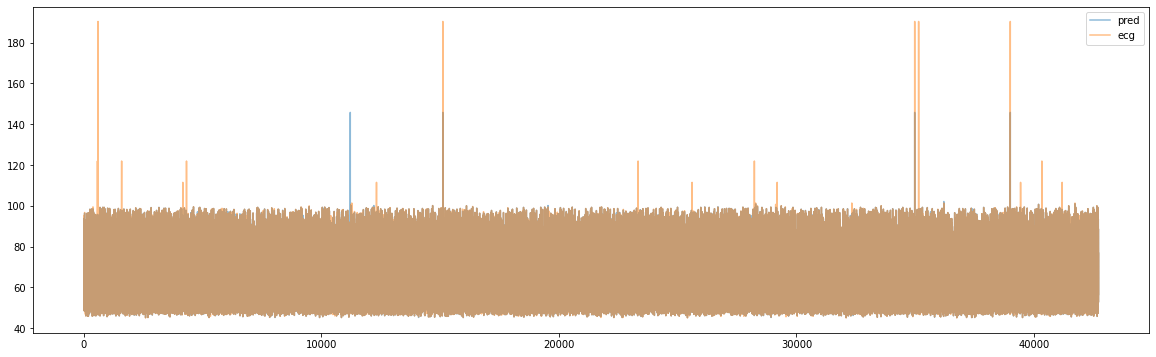

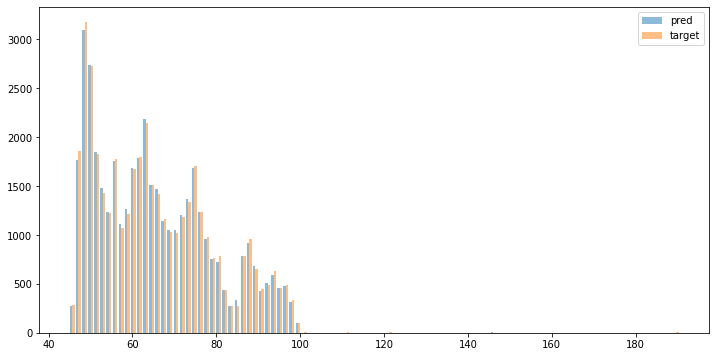

In [ ]:
graph(pred_s, test_s)

## 최종모델 개인별 확인

In [141]:
def stacking_model(n):
  X_final = data[n][['bin-2', 'bin-1', 'bin0', 'bin1', 'bin2', '512fft', '200fft', '100fft', '70fft', 'bin_var', 'motion_energy']]
  y_final = data[n][['ecg']]

  # PowerTransformer 사용시 inverse_scaler에서 NaN이 생기는 문제 발생
  scaler_X_P = StandardScaler()
  scaler_y_P = StandardScaler()

  X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state = 2)

  # 훈련데이터
  scaler_X_P.fit(X_final_train)
  X_final_train = scaler_X_P.transform(X_final_train)

  scaler_y_P.fit(y_final_train)
  y_final_train = scaler_y_P.transform(y_final_train)

  # 테스트 데이터
  X_final_test = scaler_X_P.transform(X_final_test)
  y_final_test = scaler_y_P.transform(y_final_test)

  # 전체 데이터
  X_final_scaled = scaler_X_P.fit_transform(X_final)
  y_final_scaled = scaler_y_P.fit_transform(y_final)

  #4가지 모델(SVR의 평가지표가 안좋아서 빼고 4가지 모델로 진행)
  model1 = Sequential()
  model1.add(Dense(256, input_dim=11, kernel_initializer='normal', activation='relu'))
  model1.add(Dense(512, activation='leaky_relu'))
  model1.add(Dense(512, activation='leaky_relu'))
  model1.add(Dense(1, activation='linear'))
  model1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

  model2 = RandomForestRegressor(n_estimators = 200, max_depth = 25, random_state=2)

  model3 = xgb.XGBRegressor(n_estimators = 200, max_depth=25, random_state=2)

  model4 = LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=25, random_state=2)

  # 최종모델
  lr_final = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.08, gamma=0, subsample=0.75,
                            colsample_bytree=1, max_depth=25)

  # 개별 모델로부터 메타 모델에 필요한 데이터 셋 만들기
  NN_train, NN_test = get_stacking_base_datasets(model1, X_final_train, y_final_train, X_final_test, 7)
  RFR_train, RFR_test = get_stacking_base_datasets(model2, X_final_train, y_final_train, X_final_test, 7)
  XGB_train, XGB_test = get_stacking_base_datasets(model3, X_final_train, y_final_train, X_final_test, 7)
  LGBM_train, LGBM_test = get_stacking_base_datasets(model4, X_final_train, y_final_train, X_final_test, 7)

  # 개별 모델로부터 나온 y_final_train 예측값들 옆으로 붙이기
  Stack_X_final_train = np.concatenate((NN_train, RFR_train, XGB_train, LGBM_train), axis=1)
  # 개별 모델로부터 나온 y_test 예측값들 옆으로 붙이기
  Stack_X_final_test = np.concatenate((NN_test, RFR_test, XGB_test, LGBM_test), axis=1)
  
  pred = best_model.predict(Stack_X_final_test)
  pred = pred.reshape(-1, 1)
  pred = scaler_y_P.inverse_transform(pred)

  test = scaler_y_P.inverse_transform(y_final_test)

  mse = mean_squared_error(test, pred)
  mae = mean_absolute_error(test, pred)

  ER = pd.DataFrame(pred, columns=['pred'])
  ER['ecg'] = test
  ER['Error'] = (abs(ER['pred'] - ER['ecg']) / ER['ecg']) * 100
  er = np.average(ER['Error'])

  print()
  print(file_list[int(n[2:])])
  print("MSE =", mse)
  print("MAE =", mae)
  print("Error Rate =", er)
  graph(pred, test)

폴드 세트 :  0  시작
26/26 [==============================] - 1s 7ms/step - loss: 0.5507 - mse: 0.5507 - mae: 0.4783
폴드 세트 :  1  시작
26/26 [==============================] - 0s 7ms/step - loss: 0.3091 - mse: 0.3091 - mae: 0.3025
폴드 세트 :  2  시작
26/26 [==============================] - 0s 7ms/step - loss: 0.3556 - mse: 0.3556 - mae: 0.2845
폴드 세트 :  3  시작
26/26 [==============================] - 0s 7ms/step - loss: 0.2731 - mse: 0.2731 - mae: 0.2378
폴드 세트 :  4  시작
26/26 [==============================] - 0s 7ms/step - loss: 0.3159 - mse: 0.3159 - mae: 0.2372
폴드 세트 :  5  시작
26/26 [==============================] - 0s 7ms/step - loss: 0.3225 - mse: 0.3225 - mae: 0.2449
폴드 세트 :  6  시작
26/26 [==============================] - 0s 8ms/step - loss: 0.2623 - mse: 0.2623 - mae: 0.2007
폴드 세트 :  0  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  1  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  2  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  3  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  4  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  5  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  6  시작


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


폴드 세트 :  0  시작
[05:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  1  시작
[05:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  2  시작
[05:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  3  시작
[05:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  4  시작
[05:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  5  시작
[05:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 :  6  시작
[05:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
폴드 세트 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  1  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  2  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  3  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  4  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  5  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


폴드 세트 :  6  시작


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



/content/log_20210908142718_kdu_1.0_lie_acryl111.csv
MSE = 3.867142212556407
MAE = 0.3977275205357838
Error Rate = 0.43400093348863883


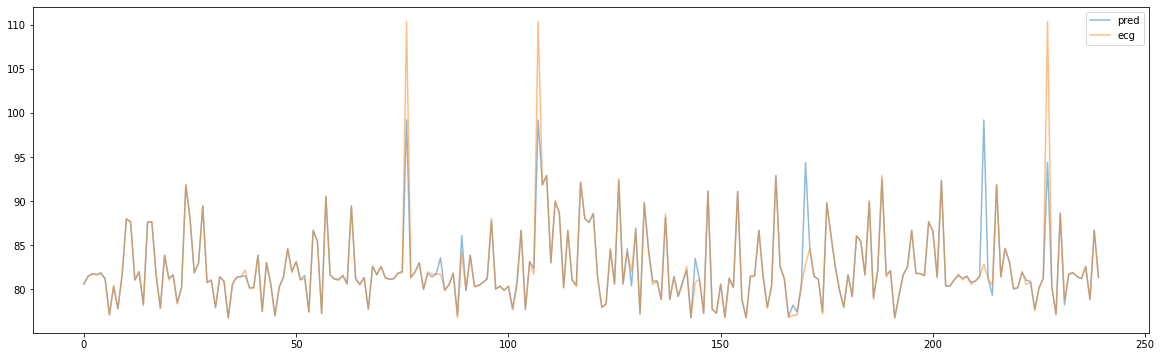

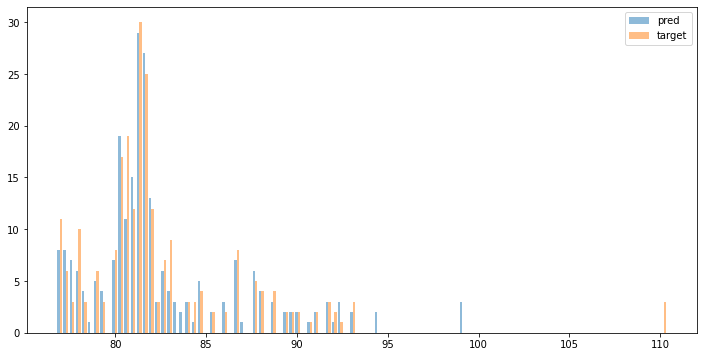

In [152]:
stacking_model('df10')